## 데이터 준비
파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능
- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
    - Vision Dataset : https://pytorch.org/vision/stable/datasets.html

    - Text Dataset : https://pytorch.org/text/stable/datasets.html

    - Audio Dataset : https://pytorch.org/audio/stable/datasets.html
    
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

Torchvision 은 파이토치에서 제공하는 데이터 셋들이 모여있는 패키지
- `transforms` : 전처리할 때 사용 되는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행

In [2]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행 </br>
`ToTensor()`를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor 형으로 변환 필요

In [3]:
mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(1.0,))
])

In [5]:
trainset = datasets.MNIST(root='./datasets', train=True, download=True, transform=mnist_transform)

testset = datasets.MNIST(root='./datasets', train=False, download=True, transform=mnist_transform)

`DataLoader`는 데이터 전체를 보관했다고 실제로 모델을 학습할 때, `batch_size` 크기만큼 데이터를 가져옴

In [6]:
train_loader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

In [7]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [8]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

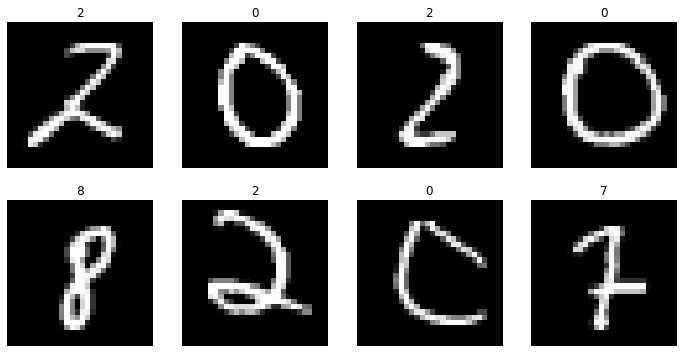

In [9]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 6))
cols, rows = 4, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1, )).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()
